In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import matplotlib.image as mpimg
from shapely.geometry import Point, LineString
import osmnx as ox

ModuleNotFoundError: No module named 'geopandas'

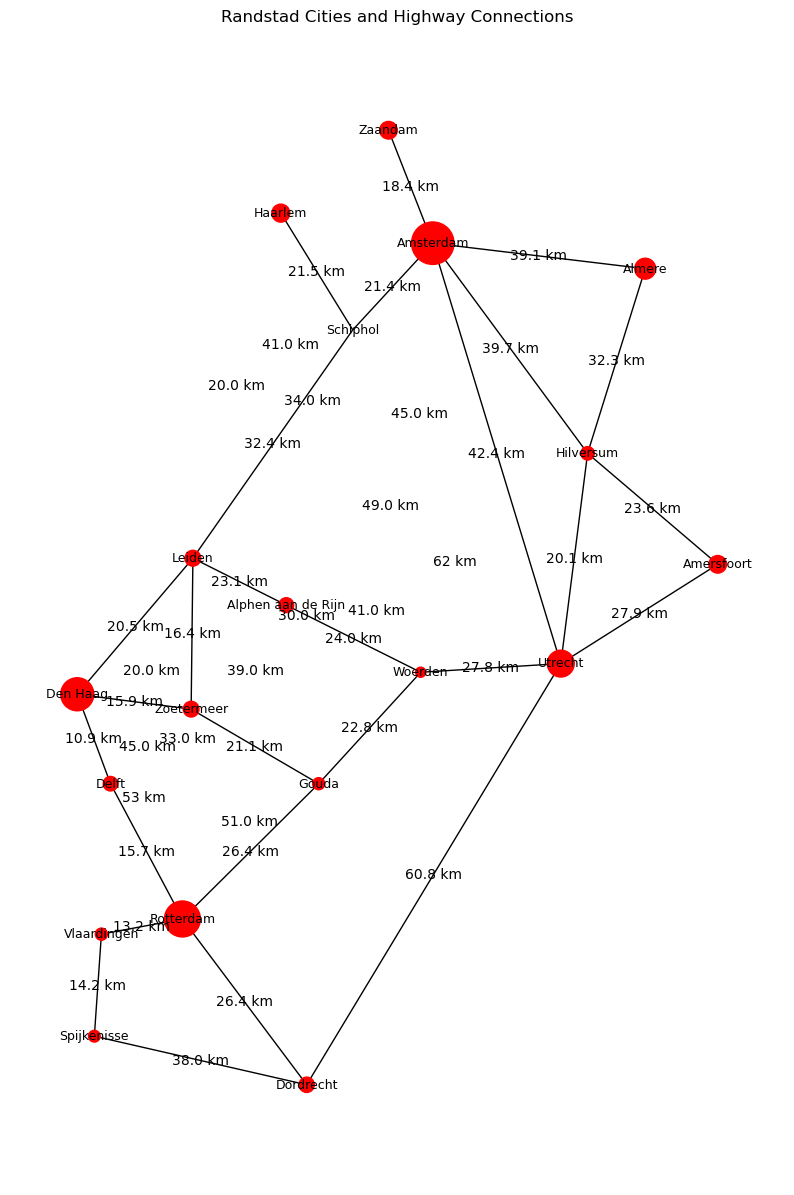

In [14]:
# Your cities and their geographical coordinates
cities_coords = {
    "Zaandam": (52.442, 4.829),
    "Amsterdam": (52.3676, 4.9041),
    "Haarlem": (52.3874, 4.6462),
    "Schiphol": (52.3105, 4.7683),
    "Leiden": (52.1601, 4.4970),
    "Den Haag": (52.0705, 4.3007),
    "Zoetermeer": (52.0607, 4.4940),
    "Delft": (52.0116, 4.3571),
    "Rotterdam": (51.9225, 4.4792),
    "Spijkenisse": (51.8453, 4.3297),
    "Dordrecht": (51.8133, 4.6901),
    "Vlaardingen": (51.9125, 4.3417),
    "Alphen aan de Rijn": (52.1292, 4.6555),
    "Gouda": (52.0116, 4.7105),
    "Woerden": (52.0850, 4.8836),
    "Utrecht": (52.0907, 5.1214),
    "Hilversum": (52.2292, 5.1669),
    "Almere": (52.3508, 5.2647),
    "Amersfoort": (52.1561, 5.3878),
}
connections_car = [
    (42.4, "Amsterdam", "Utrecht"),
    (32.4, "Leiden", "Schiphol"),
    (20.5, "Den Haag", "Leiden"),
    (21.1, "Gouda", "Zoetermeer"),
    (22.8, "Woerden", "Gouda"),
    (27.8, "Utrecht", "Woerden"),
    (10.9, "Den Haag", "Delft"),
    (18.4, "Amsterdam", "Zaandam"),
    (39.1, "Amsterdam", "Almere"),
    (39.7, "Amsterdam", "Hilversum"),
    (21.4, "Amsterdam", "Schiphol"),
    (32.3, "Almere", "Hilversum"),
    (23.6, "Amersfoort", "Hilversum"),
    (20.1, "Hilversum", "Utrecht"),
    (27.9, "Amersfoort", "Utrecht"),
    (21.5, "Haarlem", "Schiphol"),
    (23.1, "Leiden", "Alphen aan de Rijn"),
    (16.4, "Leiden", "Zoetermeer"),
    (24.0, "Woerden", "Alphen aan de Rijn"),
    (15.9, "Zoetermeer", "Den Haag"),
    (15.7, "Delft", "Rotterdam"),
    (26.4, "Rotterdam", "Gouda"),
    (13.2, "Rotterdam", "Vlaardingen"),
    (26.4, "Rotterdam", "Dordrecht"),
    (14.2, "Vlaardingen", "Spijkenisse"),
    (38.0, "Spijkenisse", "Dordrecht"),
    (60.8, "Dordrecht", "Utrecht"),
]
cities_population = {
    "Zaandam": 161429,
    "Amsterdam": 934927,
    "Haarlem": 167763,
    "Schiphol": 1,
    "Leiden": 130181,
    "Den Haag": 565701,
    "Zoetermeer": 128424,
    "Delft": 109573,
    "Rotterdam": 671125,
    "Spijkenisse": 71390,
    "Dordrecht": 122089,
    "Vlaardingen": 76472,
    "Alphen aan de Rijn": 114968,
    "Gouda": 75763,
    "Woerden": 53237,
    "Utrecht": 374411,
    "Hilversum": 94426,
    "Almere": 226630,
    "Amersfoort": 160747
}
# Create a networkx graph
G1 = nx.Graph()

# Add nodes to the graph
for city, (lat, lon) in cities_coords.items():
    population = cities_population.get(city, 0)  # Default to 0 if not found
    G1.add_node(city, pos=(lon, lat), population=population, weight=population)
# Add edges to the graph
for distance, city1, city2 in connections_car:
    G1.add_edge(city1, city2, weight=distance)

# Load the PNG image
#img = mpimg.imread('/path/to/your/SnelwegenNederland_2008.png')  # Update the path to the image

# Get positions for cities to use for layout
pos = nx.get_node_attributes(G1, 'pos')

# Draw the graph
fig, ax = plt.subplots(figsize=(10, 15))
#ax.imshow(img, extent=[3.2, 7.4, 50.7, 53.7])  # You might need to adjust the extent to fit your image
node_sizes = [G1.nodes[city]['population'] / 1000 for city in G1.nodes]
# Draw the network
nx.draw_networkx_nodes(G1, pos, node_size=node_sizes, node_color='red', ax=ax)
nx.draw_networkx_labels(G1, pos, font_size=9, ax=ax)
nx.draw_networkx_edges(G1, pos, ax=ax)

# Annotate the edges with distances
for (city1, city2, data) in G.edges(data=True):
    edge_midpoint = [(pos[city1][0] + pos[city2][0]) / 2, (pos[city1][1] + pos[city2][1]) / 2]
    ax.text(edge_midpoint[0], edge_midpoint[1], f"{data['weight']} km", size=10, ha='center', va='center')

# Set the title and remove the axis
ax.set_title('Randstad Cities and Highway Connections')
plt.axis('off')  # Turn off the axis
plt.show()

In [15]:
total_population = sum(cities_population.values())

cities_percentage = {city: (population / total_population) * 5000 for city, population in cities_population.items()}

for city, percentage in cities_percentage.items():
    print(f"Employees living in {city}: {percentage: }")



Employees living in Zaandam:  190.39775130406107
Employees living in Amsterdam:  1102.7014875484076
Employees living in Haarlem:  197.86840005217894
Employees living in Schiphol:  0.0011794519652854262
Employees living in Leiden:  153.54223629282205
Employees living in Den Haag:  667.2171562139309
Employees living in Zoetermeer:  151.46993918981556
Employees living in Delft:  129.23609019222
Employees living in Rotterdam:  791.5597002021817
Employees living in Spijkenisse:  84.20107580172657
Employees living in Dordrecht:  143.9981109897324
Employees living in Vlaardingen:  90.19505068930711
Employees living in Alphen aan de Rijn:  135.5992335449349
Employees living in Gouda:  89.35881924591973
Employees living in Woerden:  62.79048427590023
Employees living in Utrecht:  441.59978977448174
Employees living in Hilversum:  111.37093127404167
Employees living in Almere:  267.2991988926361
Employees living in Amersfoort:  189.5933650637364


In [6]:

# Average car speed
carSpeed = 90 


In [19]:
all_shortest_paths = dict(nx.all_pairs_dijkstra_path(G))
sum_travel_time = 0
sum_total_travel_time = 0
target_node = 'Leiden'
#print(f"Travel time [in minutes] from all cities to {target_node}:")
for city, shortest_paths in all_shortest_paths.items():
    if city != target_node:
        distance = nx.dijkstra_path_length(G, city, target_node)  # Distance from city to Leiden
        travel_time = distance / carSpeed * 60  # Travel time from city to Leiden
        total_travel_time = travel_time * cities_percentage[city] # Travel time multiplied with the number of employees from each city
        sum_total_travel_time += total_travel_time # Sum of travel time multiplied with the number of employees from each city
        #print(f"  From {city} to {target_node}:  Travel time = {travel_time:.2f} minutes")
average_travel_time_car = sum_total_travel_time / 5000

#print(f"Total travel time for all employees combined to {target_node} = {sum_total_travel_time} minutes")
print(f"Average travel time to {target_node} = {average_travel_time_car} minutes")


Average travel time to Leiden = 22.09362470829204 minutes


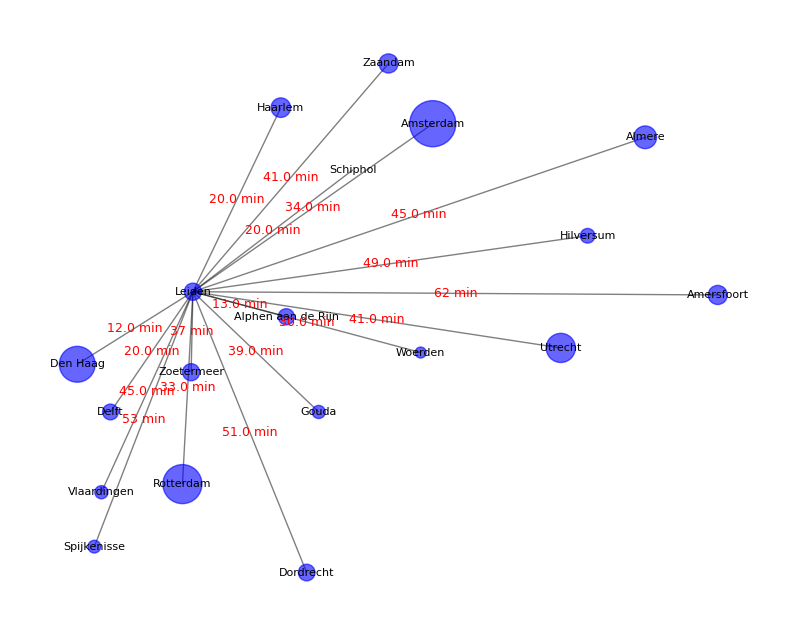

In [17]:
connections_train = [
    (41.0, "Zaandam", "Leiden"),
    (34.0, "Amsterdam", "Leiden"),
    (20.0, "Haarlem", "Leiden"),
    (20.0, "Schiphol", "Leiden"),
    (12.0, "Den Haag", "Leiden"),
    (37, "Zoetermeer", "Leiden"),
    (20.0, "Delft", "Leiden"),
    (33.0, "Rotterdam", "Leiden"),
    (53, "Spijkenisse", "Leiden"),
    (51.0, "Dordrecht", "Leiden"),
    (45.0, "Vlaardingen", "Leiden"),
    (13.0, "Alphen aan de Rijn", "Leiden"),
    (39.0, "Gouda", "Leiden"),
    (30.0, "Woerden", "Leiden"),
    (41.0, "Utrecht", "Leiden"),
    (49.0, "Hilversum", "Leiden"),
    (45.0, "Almere", "Leiden"),
    (62, "Amersfoort", "Leiden"),
]
G2 = nx.Graph()

for city, (lat, lon) in cities_coords.items():
    population_percentage = cities_percentage.get(city, 0)  # Use the percentage as node size
    G2.add_node(city, pos=(lon, lat), population_percentage=population_percentage)

for minutes, city1, city2 in connections_train:  # Ensure connections_corrected matches city names
    if city1 in G2 and city2 in G2:  # Check if both cities are in the graph
        G2.add_edge(city1, city2, weight=minutes)

pos = nx.get_node_attributes(G, 'pos')
node_sizes = [G2.nodes[city]['population_percentage'] for city in G2.nodes]  # Adjust the node size scaling factor

fig, ax = plt.subplots(figsize=(10, 8))
nx.draw_networkx_nodes(G2, pos, node_size=node_sizes, node_color='blue', alpha=0.6, ax=ax)
nx.draw_networkx_labels(G2, pos, font_size=8, ax=ax)
nx.draw_networkx_edges(G2, pos, width=1, alpha=0.5, ax=ax)

# Annotate the edges with the distance (minutes in this case)
for (node1, node2, data) in G2.edges(data=True):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    x, y = (x1 + x2) / 2, (y1 + y2) / 2
    ax.text(x, y, f"{data['weight']} min", fontsize=9, ha='center', va='center', color='red')

plt.axis('off')
plt.show()

In [18]:
# Re-initialize the dictionary to store total weighted travel time per city, excluding Leiden
total_weighted_travel_time_per_city_excl_leiden = {city: 0 for city in cities_population if city != "Leiden"}

# Adjust the loop to calculate weighted travel time per city, excluding Leiden from the computation
for minutes, city1, city2 in connections_train:
    # Skip computations involving Leiden
    if city1 != "Leiden" and city1 in cities_percentage:
        total_weighted_travel_time_per_city_excl_leiden[city1] += minutes * cities_percentage[city1]
    if city2 != "Leiden" and city2 in cities_percentage:
        total_weighted_travel_time_per_city_excl_leiden[city2] += minutes * cities_percentage[city2]

# Calculate the total weighted travel time across all cities, excluding Leiden
overall_total_weighted_time_excl_leiden = sum(total_weighted_travel_time_per_city_excl_leiden.values())

# Print the total weighted travel time per city, excluding Leiden
for city, time in total_weighted_travel_time_per_city_excl_leiden.items():
    print(f"{city}: {time:.2f} minutes")

# Print the overall total weighted travel time, excluding Leiden
print(f"Overall Total Weighted Time Excluding Leiden: {overall_total_weighted_time_excl_leiden:.2f} minutes")
print(overall_total_weighted_time_excl_leiden / 5000)


Zaandam: 7806.31 minutes
Amsterdam: 37491.85 minutes
Haarlem: 3957.37 minutes
Schiphol: 0.02 minutes
Den Haag: 8006.61 minutes
Zoetermeer: 5604.39 minutes
Delft: 2584.72 minutes
Rotterdam: 26121.47 minutes
Spijkenisse: 4462.66 minutes
Dordrecht: 7343.90 minutes
Vlaardingen: 4058.78 minutes
Alphen aan de Rijn: 1762.79 minutes
Gouda: 3484.99 minutes
Woerden: 1883.71 minutes
Utrecht: 18105.59 minutes
Hilversum: 5457.18 minutes
Almere: 12028.46 minutes
Amersfoort: 11754.79 minutes
Overall Total Weighted Time Excluding Leiden: 161915.59 minutes
32.38311831530855


In [21]:
# Difference in travel time car and train
Dif_travel_time = average_travel_time_car - overall_total_weighted_time_excl_leiden
print(Dif_travel_time)

-161893.49795183446
